<a href="https://colab.research.google.com/github/Mouni4113/mit-project/blob/main/mit_project_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

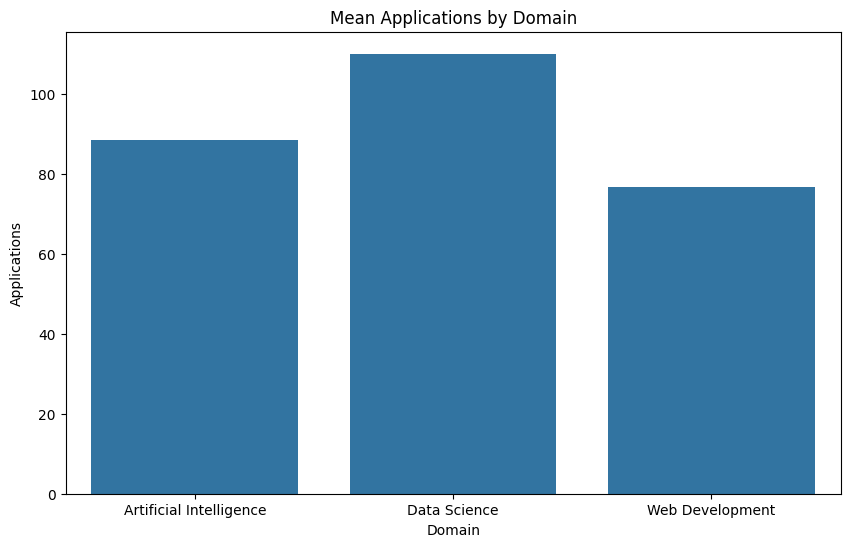

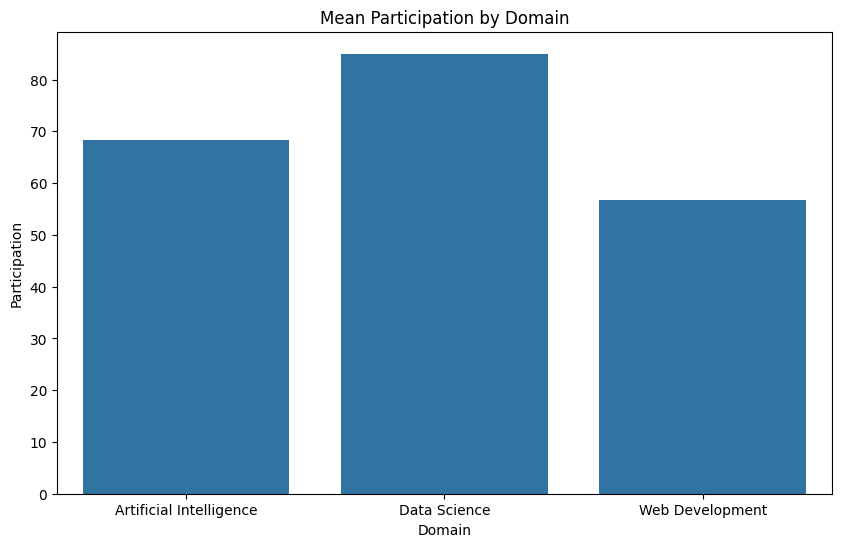

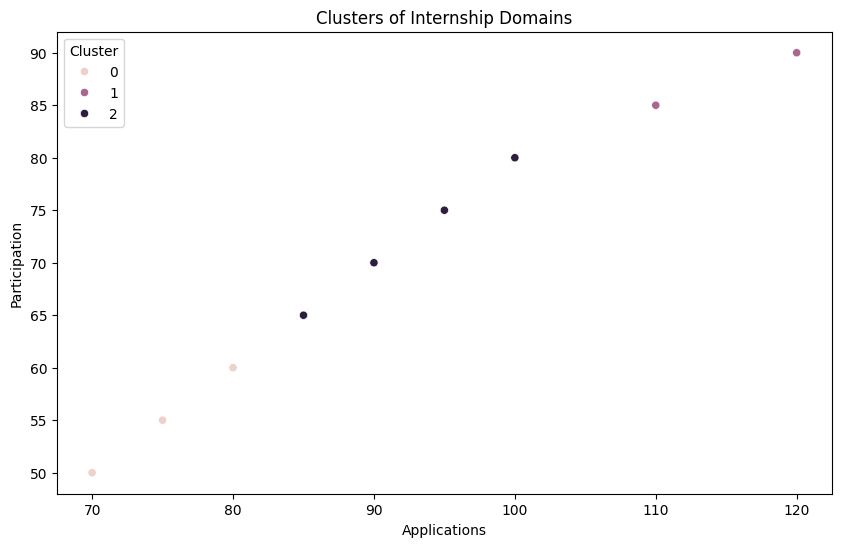

<IPython.core.display.Javascript object>

In [ ]:
#task1 using ml
!pip install dash
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {
    'Domain': ['Data Science', 'Artificial Intelligence', 'Web Development', 'Data Science', 'Artificial Intelligence', 'Web Development', 'Data Science', 'Artificial Intelligence', 'Web Development'],
    'Applications': [100, 80, 70, 120, 90, 85, 110, 95, 75],
    'Participation': [80, 60, 50, 90, 70, 65, 85, 75, 55]
}

df = pd.DataFrame(data)

domain_insights = df.groupby('Domain').mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Domain', y='Applications', data=domain_insights)
plt.title('Mean Applications by Domain')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Domain', y='Participation', data=domain_insights)
plt.title('Mean Participation by Domain')
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Applications', 'Participation']])

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Applications', y='Participation', hue='Cluster', data=df)
plt.title('Clusters of Internship Domains')
plt.show()

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Internship Domain Insights'),
    dcc.Dropdown(
        id='domain-dropdown',
        options=[{'label': domain, 'value': domain} for domain in df['Domain'].unique()],
        value=df['Domain'].unique()[0]
    ),
    dcc.Graph(id='applications-graph'),
    dcc.Graph(id='participation-graph')
])

@app.callback(
    Output('applications-graph', 'figure'),
    [Input('domain-dropdown', 'value')]
)
def update_applications_graph(domain):
    filtered_df = df[df['Domain'] == domain]
    fig = px.bar(filtered_df, x='Domain', y='Applications')
    return fig

@app.callback(
    Output('participation-graph', 'figure'),
    [Input('domain-dropdown', 'value')]
)
def update_participation_graph(domain):
    filtered_df = df[df['Domain'] == domain]
    fig = px.bar(filtered_df, x='Domain', y='Participation')
    return fig

if __name__ == '__main__':
    app.run()